<a href="https://colab.research.google.com/github/IrynaBarnych/AI21_lab/blob/lab/module6/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_text_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання

* Завантажте усі датафрейми
* Добавте до кожного стовпчик `labels` з відповідним йому класом(bussiness, sports, education, etc). назви класів беріть з назв файлів
* Об'єднайте всі датафрейми в один, див [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html)
* Створіть стовпчик `text` в якому зберігатиметься текст для подальшої роботи. Можети вибрати такі варіанти:
  * Взяти один зі стовпчиків `headline`, `description`, `content`
  * Об'єднати тексти зі стовпчиків `headline`, `description`, `content`
* Видаліть стовпчики `headline`, `description`, `content`, `url`
* Розділіть дані на тренувальні та тестові
* Застосуйте `TfidfVectorizer`
* Натренуйте модель
* Виведіть результати

**Додатково**
* У `MyTokenizer` добавте обробку тексту за допомогою `nltk`, застусуйте один з варіантів:
  * стематизація
  * лематизація(використайте `nltk.pos_tag` для визначення частини мови)
  * обидва варіанти
* Використайте `n-gram` для класифікації(можливо доведеться збільшити `max_features`)
* Натренуйте різні моделі:
  * [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
  * [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="linear"`
  * [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) з параметром `kernel="rbf"`
  * [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
* Використайте `optuna` для підбору гіперпараметрів


# Дані про статті

In [180]:
import pandas as pd

df1 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/business_data.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/education_data.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/entertainment_data.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/sports_data.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module6/data/technology_data.csv")

df = pd.concat([df1,df2,df3,df4,df5])

df.head()

,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


In [181]:
df["text"]=df["headlines"]
df=df.drop(columns=["headlines", "description", "content", "url"])
df.head()

,category,text
0,business,Nirmala Sitharaman to equal Morarji Desai’s re...
1,business,"‘Will densify network, want to be at least no...."
2,business,Air India group to induct an aircraft every si...
3,business,Red Sea woes: Exporters seek increased credit ...
4,business,Air India group to induct a plane every 6 days...


In [182]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [183]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [184]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [185]:

from nltk.stem import PorterStemmer


In [186]:

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [187]:
import string

In [188]:
class MyTokenizer:
     def __init__(self):
         self.some_args = None
     def __call__(self, text):

        words = word_tokenize(text)
        stop_words = set(stopwords.words("english"))
        filtered_words = [word for word in words if word.lower() not in stop_words and word not in string.punctuation]

        stemmer = PorterStemmer()
        stemmed_words = [stemmer.stem(word) for word in filtered_words]

        return stemmed_words



In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, tokenizer=MyTokenizer(), stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'thu', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'where

In [190]:
X_train

<8000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 69579 stored elements in Compressed Sparse Row format>

In [191]:
from sklearn.decomposition import TruncatedSVD

pca = TruncatedSVD(1000)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [192]:
pca.explained_variance_ratio_.sum()

0.7383215654679534

In [193]:
X_train.shape

(8000, 1000)

In [194]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [195]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.92      0.93      0.93       400
    education       0.97      0.96      0.97       400
entertainment       0.92      0.95      0.94       400
       sports       0.94      0.90      0.92       400
   technology       0.91      0.92      0.92       400

     accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
 weighted avg       0.93      0.93      0.93      2000



[]

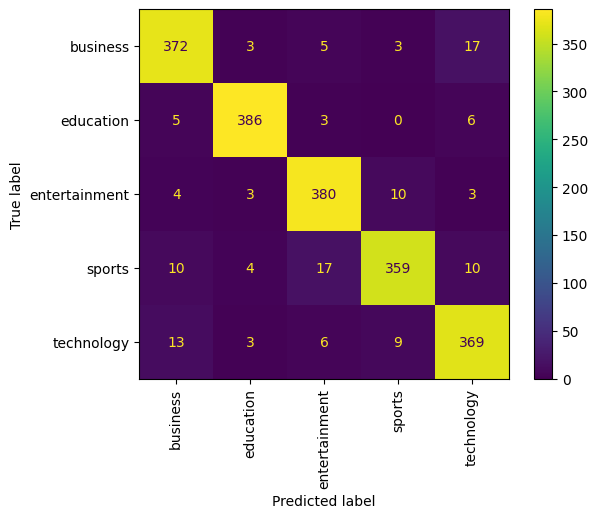

In [196]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.xticks(rotation=90)
plt.plot()

In [197]:
from sklearn.pipeline import Pipeline

final_model = Pipeline(steps=[
    ('vectorizer', vectorizer),
    ('pca', pca),
    ('model', model)
])

final_model

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=3000, stop_words='english',
                                 tokenizer=<__main__.MyTokenizer object at 0x7ac9bf5e32b0>)),
                ('pca', TruncatedSVD(n_components=1000)),
                ('model', LogisticRegression(class_weight='balanced'))])